In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

# Colab 한글 폰트 설정
# !pip install koreanize-matplotlib
# import koreanize_matplotlib
# import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('https://raw.githubusercontent.com/bamcasa/Statistical-Computing/refs/heads/main/jeju_data.csv')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14315 entries, 0 to 14314
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TRAVELER_ID                14315 non-null  object 
 1   VISIT_AREA_ID              14315 non-null  int64  
 2   ACTIVITY_TYPE_CD           14315 non-null  int64  
 3   ACTIVITY_TYPE_SEQ          14315 non-null  int64  
 4   CONSUME_HIS_SEQ            14315 non-null  int64  
 5   CONSUME_HIS_SNO            14315 non-null  int64  
 6   PAYMENT_NUM                14315 non-null  int64  
 7   BRNO                       13881 non-null  float64
 8   STORE_NM                   14312 non-null  object 
 9   ROAD_NM_ADDR               14315 non-null  object 
 10  LOTNO_ADDR                 14315 non-null  object 
 11  ROAD_NM_CD                 14315 non-null  float64
 12  LOTNO_CD                   14315 non-null  float64
 13  PAYMENT_DT                 14315 non-null  obj

In [24]:
data

,TRAVELER_ID,VISIT_AREA_ID,ACTIVITY_TYPE_CD,ACTIVITY_TYPE_SEQ,CONSUME_HIS_SEQ,CONSUME_HIS_SNO,PAYMENT_NUM,BRNO,STORE_NM,ROAD_NM_ADDR,...,ROAD_NM_CD,LOTNO_CD,PAYMENT_DT,PAYMENT_MTHD_SE,PAYMENT_AMT_WON,PAYMENT_ETC,SGG_CD,PAYMENT_DT_HOUR,TRAVEL_STATUS_RESIDENCE,TRAVEL_STATUS_DESTINATION
0,h001195,2306220006,1,0,0,1,4,8.979102e+09,동문남해수산,제주특별자치도 제주시 동문로2길 10,...,4847600.0,5.011010e+09,2023-06,1,40000.0,NaN,NaN,19,충청남도,제주
1,h000051,2305280009,1,0,0,1,1,2.018122e+09,스타벅스,제주특별자치도 서귀포시 성산읍 일출로 80,...,3350244.0,5.013026e+09,2023-05,3,6900.0,V)핑크 D리프레셔,NaN,20,대전광역시,제주
2,h000051,2305290005,1,0,0,1,1,4.830402e+09,오늘의 감정 오감,제주특별자치도 제주시 구좌읍 세화11길 12,...,4848006.0,5.011026e+09,2023-05,1,6000.0,당근쥬스,NaN,13,대전광역시,제주
3,h000053,2305260001,2,0,0,1,1,8.968200e+09,간세라운지,제주특별자치도 제주시 관덕로8길 7-9,...,4847168.0,5.011010e+09,2023-05,1,10000.0,규스마그간세;간세배지3종,NaN,8,경기도,제주
4,h000069,2305170012,1,0,0,2,2,6.169258e+09,탐라수산,제주특별자치도 서귀포시 중정로61번길 8,...,4850836.0,5.013010e+09,2023-05,1,8000.0,NaN,NaN,20,서울특별시,제주
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14310,h006870,2309230005,1,0,0,1,2,8.745401e+09,정씨네소몰이,제주특별자치도 제주시 원노형남1길 32,...,4848499.0,5.011012e+09,2023-09,1,101000.0,모듬구이(대) 샤브샤브;소주;샤브샤브추가;칼국수,NaN,19,제주특별자치도,제주
14311,h006870,2309230002,1,1,1,1,2,7.560502e+09,하우투플레이,제주특별자치도 제주시 애월읍 일주서로 6935,...,3349236.0,5.011025e+09,2023-09,1,36000.0,더블치즈버거;치즈버거;치킨/포테이트;닥터페퍼;스프라이트,NaN,12,제주특별자치도,제주
14312,h006874,2309220002,1,0,0,1,1,6.352601e+09,꼬스뗀뇨,제주특별자치도 제주시 구좌읍 해맞이해안로 2080,...,3349242.0,5.011026e+09,2023-09,1,9000.0,소금버터빵;아메리카노(ICE),NaN,13,제주특별자치도,제주
14313,h006874,2309220005,1,0,0,1,1,2.970201e+09,민경이네어등포해녀촌,제주특별자치도 제주시 구좌읍 해맞이해안로 830,...,3349242.0,5.011026e+09,2023-09,1,16000.0,NaN,NaN,18,제주특별자치도,제주


전처리

In [25]:
def extract_index_one(x):
    if pd.notnull(x):
        parts = x.split()
        if len(parts) >= 3:
            return (parts[1] + parts[2])
    return x

data['ROAD_NM_ADDR'] = data['ROAD_NM_ADDR'].apply(extract_index_one)
data['LOTNO_ADDR'] = data['LOTNO_ADDR'].apply(extract_index_one)

In [26]:
data['ROAD_NM_ADDR'].unique()

array(['제주시동문로2길', '서귀포시성산읍', '제주시구좌읍', '제주시관덕로8길', '서귀포시중정로61번길',
       '제주시중앙로13길', '제주시애월읍', '제주시무근성7길', '제주시흥운길', '제주시우도면', '제주시우령6길',
       '서귀포시월평하원로', '서귀포시칠십리로214번길', '제주시관덕로4길', '서귀포시중앙로62번길',
       '서귀포시일주동로', '서귀포시중앙로42번길', '제주시동문로4길', '제주시서사로', '제주시관덕로14길',
       '제주시동샘길', '제주시한림읍', '서귀포시중문관광로110번길', '서귀포시표선면', '서귀포시남성중로',
       '서귀포시중산간서로157번길', '제주시조천읍', '강서구공항진입로', '제주시삼무로', '제주시서해안로',
       '강서구하늘길', '서귀포시중앙로48번길', '서귀포시안덕면', '서귀포시대정읍', '서귀포시염돈로', '제주시공항로',
       '제주시광양14길', '서귀포시남원읍', '서귀포시보목포로', '제주시한경면', '제주시테우해안로',
       '서귀포시중정로73번길', '서귀포시동문동로', '제주시중앙로14길', '서귀포시중문관광로', '제주시동문로',
       '제주시성화로1길', '제주시오현길', '제주시탑동로', '제주시성화로', '서귀포시중앙로54번길',
       '제주시광양10길', '제주시노연로', '제주시용문로14길', '제주시오라로', '서귀포시쇠소깍로',
       '서귀포시김정문화로', '제주시관덕로2길', '서귀포시일주서로', '서귀포시천제연로', '제주시서광로2길',
       '제주시용문로', '서귀포시중앙로', '서귀포시효돈로', '제주시1100로', '제주시연북로', '서귀포시이어도로',
       '성남시분당구', '서귀포시소암로12번길', '제주시서문로', '서귀포시천제연로207번길', '제주시선사로6길',
       '제주시삼무로3길', '제주시오래물길', '서귀포시중산간서로',

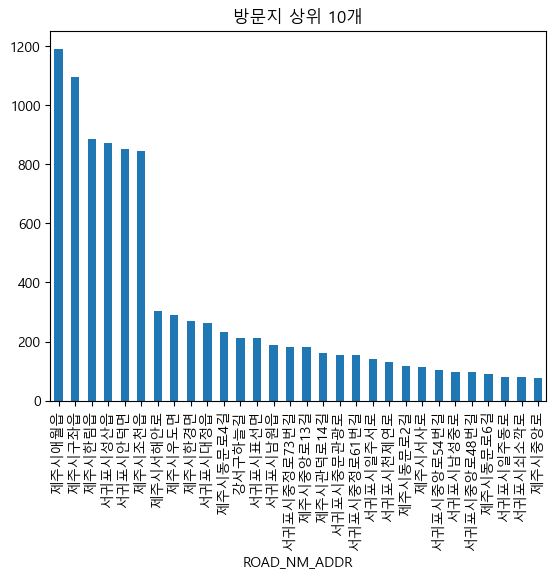

In [27]:
# 상위 10개만 시각화
plt.title('방문지 상위 10개')
data['ROAD_NM_ADDR'].value_counts().head(30).plot(kind='bar')
plt.show()

In [28]:
data['LOTNO_ADDR'].unique()

array(['제주시일도일동', '서귀포시성산읍', '제주시구좌읍', '서귀포시서귀동', '제주시이도일동', '제주시애월읍',
       '제주시삼도이동', '제주시용담이동', '제주시우도면', '제주시외도일동', '서귀포시월평동', '서귀포시동홍동',
       '제주시영평동', '제주시한림읍', '서귀포시색달동', '서귀포시표선면', '서귀포시서홍동', '서귀포시강정동',
       '제주시조천읍', '강서구대저2동', '제주시연동', '제주시용담삼동', '강서구공항동', '서귀포시안덕면',
       '서귀포시대정읍', '제주시이도이동', '서귀포시남원읍', '서귀포시하효동', '제주시한경면', '제주시이호일동',
       '서귀포시중문동', '제주시오라삼동', '서귀포시대포동', '서귀포시법환동', '제주시오라일동', '제주시도두일동',
       '제주시노형동', '제주시화북이동', '성남시분당구', '제주시용담일동', '제주시삼양일동', '서귀포시회수동',
       '제주시삼도일동', '제주시도두이동', '서귀포시토평동', '제주시일도이동', '진도군진도읍', '제주시아라일동',
       '서귀포시하예동', '제주시건입동', '서귀포시상예동', '서귀포시상효동', '제주시월평동', '강서구개화동',
       '중구순화동', '제주시해안동', '제주시봉개동', '해운대구좌동', '의정부시가능동', '청주시청원구',
       '중구을지로4가', '제주시오등동', '목포시대안동', '제주시도남동', '경주시문무대왕면', '제주시외도이동',
       '제주시화북일동', '동구지저동', '서귀포시호근동', '서귀포시서호동', '제주시회천동', '송파구방이동',
       '강남구삼성동', '제주시오라이동', '구로구구로동', '강서구과해동', '제주시아라이동', '안양시만안구',
       '제주시이호이동', '서초구서초동', '서구치평동', '제주시도련이동', '서귀포시신효동', '마포구망원동',
       '마포구합정동

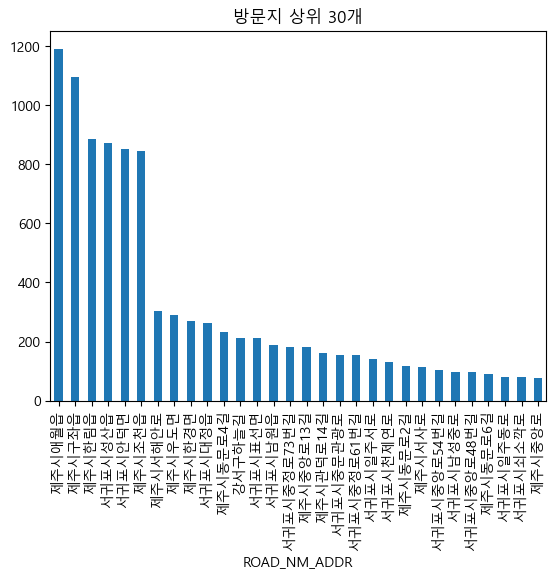

In [29]:
# 상위 30개만 시각화
plt.title('방문지 상위 30개') 
data['ROAD_NM_ADDR'].value_counts().head(30).plot(kind='bar')
plt.show()

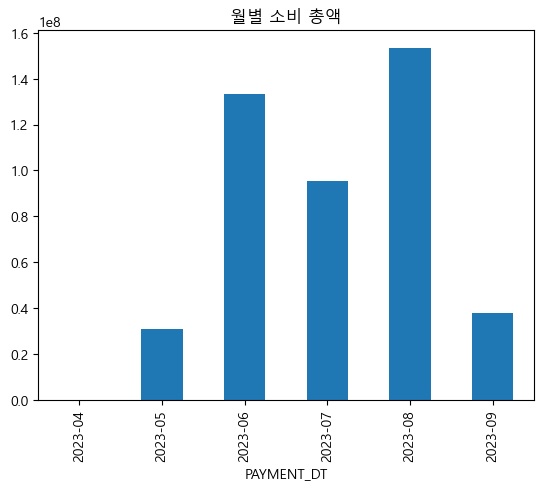

In [30]:
# 월별 소비 총액
plt.title('월별 소비 총액')
data.groupby('PAYMENT_DT')['PAYMENT_AMT_WON'].sum().plot(kind='bar')
plt.show()

<Axes: title={'center': '지역별 소비 총액'}, xlabel='ROAD_NM_ADDR'>

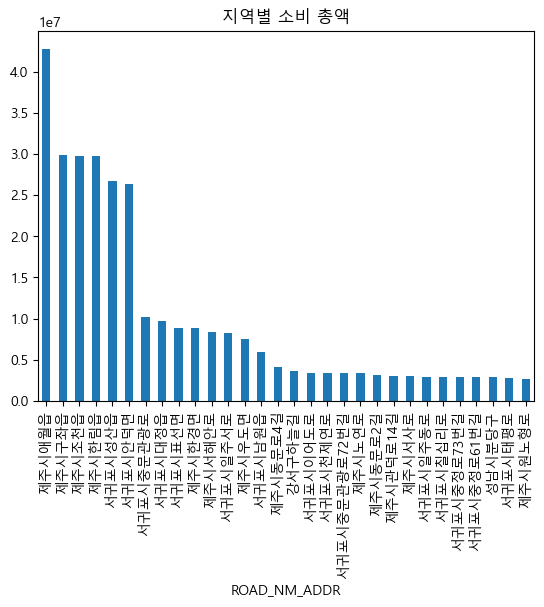

In [31]:
# 지역별 소비 총액 상위 30개만
plt.title('지역별 소비 총액')
data.groupby('ROAD_NM_ADDR')['PAYMENT_AMT_WON'].sum().sort_values(ascending=False).head(30).plot(kind='bar')

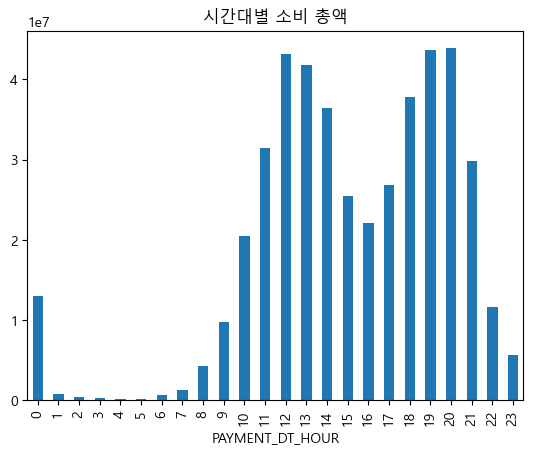

In [32]:
# 시간대 별 소비 총액
plt.title('시간대별 소비 총액')
data.groupby('PAYMENT_DT_HOUR')['PAYMENT_AMT_WON'].sum().plot(kind='bar')
plt.show()

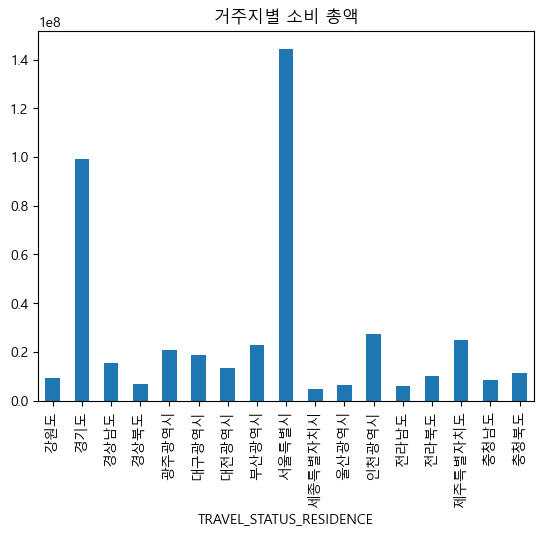

In [33]:
# TRAVEL_STATUS_RESIDENCE별 소비 총액

plt.title('거주지별 소비 총액')
data.groupby('TRAVEL_STATUS_RESIDENCE')['PAYMENT_AMT_WON'].sum().plot(kind='bar')
plt.show()

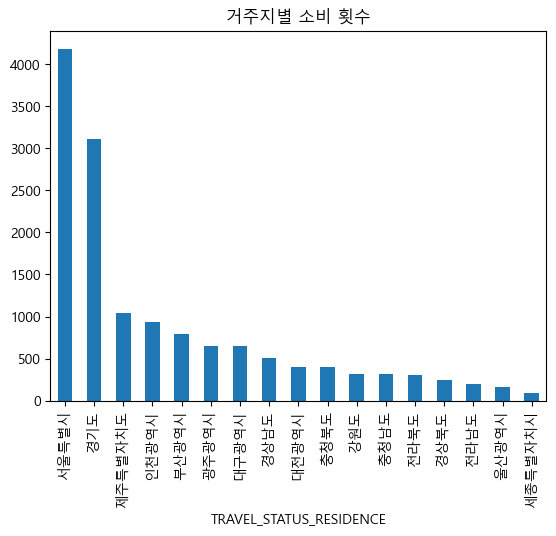

In [34]:
# TRAVEL_STATUS_RESIDENCE 개수'
plt.title('거주지별 소비 횟수')
data['TRAVEL_STATUS_RESIDENCE'].value_counts().plot(kind='bar')
plt.show()

<Axes: title={'center': '거주지별 소비 평균'}, xlabel='TRAVEL_STATUS_RESIDENCE'>

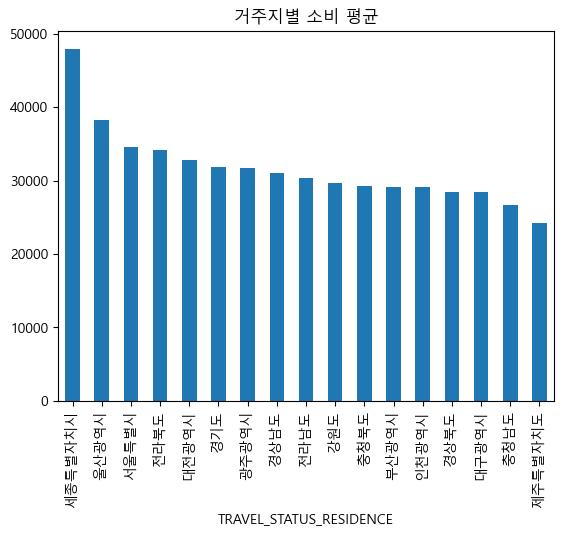

In [35]:
# TRAVEL_STATUS_RESIDENCE(거주지)별 소비 평균
# 제목 : 거주지별 소비 평균

plt.title('거주지별 소비 평균')

data.groupby('TRAVEL_STATUS_RESIDENCE')['PAYMENT_AMT_WON'].mean().sort_values(ascending=False).plot(kind='bar')